# Healthcare Claims Fraud Detection - Feature Engineering

## Overview
This notebook performs comprehensive feature engineering on the cleaned healthcare claims dataset to prepare it for machine learning models. We'll create new features, perform encoding, and apply scaling to optimize model performance.

## Objectives
- Load cleaned data from EDA phase
- Create meaningful engineered features
- Apply appropriate encoding techniques for categorical variables
- Scale numerical features for model optimization
- Export processed data for model training

## Feature Engineering Strategy
1. **Temporal Features**: Extract insights from date-related columns
2. **Financial Features**: Create ratios and derived financial metrics
3. **Categorical Encoding**: Apply One-Hot and Target Encoding appropriately
4. **Numerical Scaling**: Standardize numerical features
5. **Risk Indicators**: Create binary flags for high-risk scenarios

---

In [150]:
# 📚 Core Libraries for Feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Feature Engineering Libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce

# Configure plotting and warnings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
warnings.filterwarnings('ignore')

# Ensure plots directory exists
os.makedirs('../plots', exist_ok=True)

print("✅ Feature Engineering libraries imported successfully!")
print("📊 Ready for comprehensive feature engineering pipeline")

✅ Feature Engineering libraries imported successfully!
📊 Ready for comprehensive feature engineering pipeline


In [151]:
# 🔄 Load Cleaned Data from EDA Phase
print("Loading cleaned dataset from EDA phase...")

try:
    df_eda = pd.read_csv('../data/health_claims_eda.csv')
    print(f"✅ Data loaded successfully!")
    print(f"📊 Dataset shape: {df_eda.shape}")
    print(f"💾 Memory usage: {df_eda.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Validate data integrity
    print(f"\n🔍 Data Quality Check:")
    print(f"  • Missing values: {df_eda.isnull().sum().sum()}")
    print(f"  • Duplicate rows: {df_eda.duplicated().sum()}")
    print(f"  • Target distribution: {df_eda['Is_Fraudulent'].value_counts().to_dict()}")
    
except FileNotFoundError:
    print("❌ Error: Cleaned data file not found!")
    print("Please run 01_eda.ipynb first to generate the cleaned dataset.")
except Exception as e:
    print(f"❌ Error loading data: {e}")

Loading cleaned dataset from EDA phase...
✅ Data loaded successfully!
📊 Dataset shape: (20100, 25)
💾 Memory usage: 16.62 MB

🔍 Data Quality Check:
  • Missing values: 231
  • Duplicate rows: 26
  • Target distribution: {False: 15089, True: 5011}


In [152]:
df_eda.head()

,Claim_Date,Service_Date,Claim_Amount,Patient_Age,Patient_Gender,Patient_State,Hospital_ID,Provider_Type,Provider_Specialty,Provider_State,...,Length_of_Stay_Days,Service_Type,Deductible_Amount,CoPay_Amount,Number_of_Previous_Claims_Patient,Number_of_Previous_Claims_Provider,Provider_Patient_Distance_Miles,Claim_Submitted_Late,Is_Fraudulent,Age_Group
0,16-06-2021,01-05-2021,462337.48,28.0,Female,WI,53,Laboratory,Cardiology,WA,...,47,Inpatient,3440.06,824.59,0,16,939.08,True,False,18-30
1,19-01-2025,17-01-2025,1883481.30,40.0,Other,CO,408,Laboratory,Cardiology,AZ,...,0,Outpatient,3618.40,851.43,0,6,170.40,False,True,30-50
2,05-05-2023,24-03-2023,1500658.89,90.0,Female,FL,106,Hospital,Neurology,NC,...,0,Pharmacy,2442.41,616.23,0,2,549.38,True,False,65+
3,07-11-2021,02-11-2021,572237.61,49.0,Other,MD,933,Specialist Office,Pediatrics,TX,...,0,Pharmacy,587.78,459.33,0,2,396.49,False,True,30-50
4,25-03-2024,18-02-2024,2088293.84,24.0,Female,FL,827,Specialist Office,Pediatrics,PA,...,0,Emergency Room,3047.55,847.40,0,15,865.87,True,False,18-30


In [153]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Claim_Date                          20100 non-null  object 
 1   Service_Date                        20100 non-null  object 
 2   Claim_Amount                        20100 non-null  float64
 3   Patient_Age                         20100 non-null  float64
 4   Patient_Gender                      20100 non-null  object 
 5   Patient_State                       20100 non-null  object 
 6   Hospital_ID                         20100 non-null  int64  
 7   Provider_Type                       20100 non-null  object 
 8   Provider_Specialty                  20100 non-null  object 
 9   Provider_State                      20100 non-null  object 
 10  Diagnosis_Code                      20100 non-null  object 
 11  Procedure_Code                      20100

In [154]:
## Convert all date columns to datetime format
date_columns = ['Claim_Date', 'Service_Date']
for col in date_columns:
    df_eda[col] = pd.to_datetime(df_eda[col], dayfirst=True, errors='coerce')

df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Claim_Date                          20100 non-null  datetime64[ns]
 1   Service_Date                        20100 non-null  datetime64[ns]
 2   Claim_Amount                        20100 non-null  float64       
 3   Patient_Age                         20100 non-null  float64       
 4   Patient_Gender                      20100 non-null  object        
 5   Patient_State                       20100 non-null  object        
 6   Hospital_ID                         20100 non-null  int64         
 7   Provider_Type                       20100 non-null  object        
 8   Provider_Specialty                  20100 non-null  object        
 9   Provider_State                      20100 non-null  object        
 10  Diagnosis_Code        

In [155]:
## find difference between Claim_Date and Service_Date
df_eda['Claim_Service_Difference'] = (df_eda['Claim_Date'] - df_eda['Service_Date']).dt.days

In [156]:
df_eda.head()  # Display the first few rows of the DataFrame

,Claim_Date,Service_Date,Claim_Amount,Patient_Age,Patient_Gender,Patient_State,Hospital_ID,Provider_Type,Provider_Specialty,Provider_State,...,Service_Type,Deductible_Amount,CoPay_Amount,Number_of_Previous_Claims_Patient,Number_of_Previous_Claims_Provider,Provider_Patient_Distance_Miles,Claim_Submitted_Late,Is_Fraudulent,Age_Group,Claim_Service_Difference
0,2021-06-16,2021-05-01,462337.48,28.0,Female,WI,53,Laboratory,Cardiology,WA,...,Inpatient,3440.06,824.59,0,16,939.08,True,False,18-30,46
1,2025-01-19,2025-01-17,1883481.30,40.0,Other,CO,408,Laboratory,Cardiology,AZ,...,Outpatient,3618.40,851.43,0,6,170.40,False,True,30-50,2
2,2023-05-05,2023-03-24,1500658.89,90.0,Female,FL,106,Hospital,Neurology,NC,...,Pharmacy,2442.41,616.23,0,2,549.38,True,False,65+,42
3,2021-11-07,2021-11-02,572237.61,49.0,Other,MD,933,Specialist Office,Pediatrics,TX,...,Pharmacy,587.78,459.33,0,2,396.49,False,True,30-50,5
4,2024-03-25,2024-02-18,2088293.84,24.0,Female,FL,827,Specialist Office,Pediatrics,PA,...,Emergency Room,3047.55,847.40,0,15,865.87,True,False,18-30,36


In [157]:
df_eda.Claim_Service_Difference.isnull().sum()  # Check for null values in the new column

0

In [158]:
df_eda.Claim_Service_Difference.describe()  # Get a summary of the new column

count    20100.000000
mean        45.041940
std         26.321027
min          0.000000
25%         22.000000
50%         45.000000
75%         68.000000
max         90.000000
Name: Claim_Service_Difference, dtype: float64

In [159]:
def categorize_risk(days):
    if days < 60:
        return 'Low Risk'
    elif days <= 90:
        return 'High Risk'
    else:
        return 'High Risk'

df_eda['Risk_Category'] = df_eda['Claim_Service_Difference'].apply(categorize_risk)

In [160]:
df_eda.head()  # Display the first few rows of the DataFrame

,Claim_Date,Service_Date,Claim_Amount,Patient_Age,Patient_Gender,Patient_State,Hospital_ID,Provider_Type,Provider_Specialty,Provider_State,...,Deductible_Amount,CoPay_Amount,Number_of_Previous_Claims_Patient,Number_of_Previous_Claims_Provider,Provider_Patient_Distance_Miles,Claim_Submitted_Late,Is_Fraudulent,Age_Group,Claim_Service_Difference,Risk_Category
0,2021-06-16,2021-05-01,462337.48,28.0,Female,WI,53,Laboratory,Cardiology,WA,...,3440.06,824.59,0,16,939.08,True,False,18-30,46,Low Risk
1,2025-01-19,2025-01-17,1883481.30,40.0,Other,CO,408,Laboratory,Cardiology,AZ,...,3618.40,851.43,0,6,170.40,False,True,30-50,2,Low Risk
2,2023-05-05,2023-03-24,1500658.89,90.0,Female,FL,106,Hospital,Neurology,NC,...,2442.41,616.23,0,2,549.38,True,False,65+,42,Low Risk
3,2021-11-07,2021-11-02,572237.61,49.0,Other,MD,933,Specialist Office,Pediatrics,TX,...,587.78,459.33,0,2,396.49,False,True,30-50,5,Low Risk
4,2024-03-25,2024-02-18,2088293.84,24.0,Female,FL,827,Specialist Office,Pediatrics,PA,...,3047.55,847.40,0,15,865.87,True,False,18-30,36,Low Risk


In [161]:
df_eda.Risk_Category.value_counts()

Risk_Category
Low Risk     13207
High Risk     6893
Name: count, dtype: int64

In [162]:
df_eda['Cost_Per_Procedure'] = df_eda['Claim_Amount'] / (df_eda['Number_of_Procedures'] + 1)
df_eda['Log_Claim_Amount'] = np.log1p(df_eda['Claim_Amount'])
threshold_95 = df_eda['Claim_Amount'].quantile(0.95)
df_eda['High_Cost_Claim_Flag'] = (df_eda['Claim_Amount'] > threshold_95).astype(int)

In [163]:
df_eda.head()  # Display the first few rows of the DataFrame

,Claim_Date,Service_Date,Claim_Amount,Patient_Age,Patient_Gender,Patient_State,Hospital_ID,Provider_Type,Provider_Specialty,Provider_State,...,Number_of_Previous_Claims_Provider,Provider_Patient_Distance_Miles,Claim_Submitted_Late,Is_Fraudulent,Age_Group,Claim_Service_Difference,Risk_Category,Cost_Per_Procedure,Log_Claim_Amount,High_Cost_Claim_Flag
0,2021-06-16,2021-05-01,462337.48,28.0,Female,WI,53,Laboratory,Cardiology,WA,...,16,939.08,True,False,18-30,46,Low Risk,154112.493333,13.044053,0
1,2025-01-19,2025-01-17,1883481.30,40.0,Other,CO,408,Laboratory,Cardiology,AZ,...,6,170.40,False,True,30-50,2,Low Risk,627827.100000,14.448633,0
2,2023-05-05,2023-03-24,1500658.89,90.0,Female,FL,106,Hospital,Neurology,NC,...,2,549.38,True,False,65+,42,Low Risk,750329.445000,14.221415,0
3,2021-11-07,2021-11-02,572237.61,49.0,Other,MD,933,Specialist Office,Pediatrics,TX,...,2,396.49,False,True,30-50,5,Low Risk,114447.522000,13.257311,0
4,2024-03-25,2024-02-18,2088293.84,24.0,Female,FL,827,Specialist Office,Pediatrics,PA,...,15,865.87,True,False,18-30,36,Low Risk,348048.973333,14.551858,0


In [164]:
df_eda.High_Cost_Claim_Flag.value_counts()

High_Cost_Claim_Flag
0    19095
1     1005
Name: count, dtype: int64

In [165]:
df_eda.isnull().sum() 

Claim_Date                              0
Service_Date                            0
Claim_Amount                            0
Patient_Age                             0
Patient_Gender                          0
Patient_State                           0
Hospital_ID                             0
Provider_Type                           0
Provider_Specialty                      0
Provider_State                          0
Diagnosis_Code                          0
Procedure_Code                          0
Number_of_Procedures                    0
Admission_Type                          0
Discharge_Type                          0
Length_of_Stay_Days                     0
Service_Type                            0
Deductible_Amount                       0
CoPay_Amount                            0
Number_of_Previous_Claims_Patient       0
Number_of_Previous_Claims_Provider      0
Provider_Patient_Distance_Miles         0
Claim_Submitted_Late                    0
Is_Fraudulent                     

In [166]:

# Age Group Binning
bins = [-0.1, 18, 40, 64, 120]
labels = ['Child', 'Adult', 'MiddleAged', 'Senior']
df_eda['Patient_Age_Group'] = pd.cut(df_eda['Patient_Age'], bins=bins, labels=labels, right=True)

# Patient State Risk (Target Encoding)
state_fraud_rate = df_eda.groupby('Patient_State')['Is_Fraudulent'].mean()
df_eda['Patient_State_Risk'] = df_eda['Patient_State'].map(state_fraud_rate)

# Patient New Flag
df_eda['Patient_New'] = (df_eda['Number_of_Previous_Claims_Patient'] == 0).astype(int)

# Patient High Claims Flag
threshold_patient_claims = df_eda['Number_of_Previous_Claims_Patient'].quantile(0.90)
df_eda['Patient_High_Claims'] = (df_eda['Number_of_Previous_Claims_Patient'] > threshold_patient_claims).astype(int)


In [167]:
df_eda.Patient_Age_Group.value_counts() # Check unique values in the new age group column

df_eda[df_eda['Patient_Age_Group'].isnull()]  # Check for any states with no fraud data

,Claim_Date,Service_Date,Claim_Amount,Patient_Age,Patient_Gender,Patient_State,Hospital_ID,Provider_Type,Provider_Specialty,Provider_State,...,Age_Group,Claim_Service_Difference,Risk_Category,Cost_Per_Procedure,Log_Claim_Amount,High_Cost_Claim_Flag,Patient_Age_Group,Patient_State_Risk,Patient_New,Patient_High_Claims


In [168]:
df_eda.isnull().sum()  # Check for any remaining null values in the DataFrame   

Claim_Date                              0
Service_Date                            0
Claim_Amount                            0
Patient_Age                             0
Patient_Gender                          0
Patient_State                           0
Hospital_ID                             0
Provider_Type                           0
Provider_Specialty                      0
Provider_State                          0
Diagnosis_Code                          0
Procedure_Code                          0
Number_of_Procedures                    0
Admission_Type                          0
Discharge_Type                          0
Length_of_Stay_Days                     0
Service_Type                            0
Deductible_Amount                       0
CoPay_Amount                            0
Number_of_Previous_Claims_Patient       0
Number_of_Previous_Claims_Provider      0
Provider_Patient_Distance_Miles         0
Claim_Submitted_Late                    0
Is_Fraudulent                     

In [169]:
df_eda.Patient_New.value_counts(), df_eda.Patient_High_Claims.value_counts()

(Patient_New
 1    20094
 0        6
 Name: count, dtype: int64,
 Patient_High_Claims
 0    20094
 1        6
 Name: count, dtype: int64)

In [170]:
df_eda.Provider_Patient_Distance_Miles.describe()  # Get a summary of the distance column

count    20100.000000
mean       499.480532
std        289.745360
min          0.020000
25%        246.380000
50%        498.410000
75%        751.000000
max        999.980000
Name: Provider_Patient_Distance_Miles, dtype: float64

In [171]:
## Cross State flag
df_eda['Cross_State'] = (df_eda['Patient_State'] != df_eda['Provider_State']).astype(int)

## Distance bins
distance_bins = [0, 250, 750, np.inf]
distance_labels = ['Low', 'Medium', 'High']
df_eda['Provider_Patient_Distance_Category'] = pd.cut(df_eda['Provider_Patient_Distance_Miles'], bins=distance_bins, labels=distance_labels, right=False)

In [172]:
df_eda.head()  # Display the first few rows of the DataFrame

,Claim_Date,Service_Date,Claim_Amount,Patient_Age,Patient_Gender,Patient_State,Hospital_ID,Provider_Type,Provider_Specialty,Provider_State,...,Risk_Category,Cost_Per_Procedure,Log_Claim_Amount,High_Cost_Claim_Flag,Patient_Age_Group,Patient_State_Risk,Patient_New,Patient_High_Claims,Cross_State,Provider_Patient_Distance_Category
0,2021-06-16,2021-05-01,462337.48,28.0,Female,WI,53,Laboratory,Cardiology,WA,...,Low Risk,154112.493333,13.044053,0,Adult,0.269080,1,0,1,High
1,2025-01-19,2025-01-17,1883481.30,40.0,Other,CO,408,Laboratory,Cardiology,AZ,...,Low Risk,627827.100000,14.448633,0,Adult,0.239351,1,0,1,Low
2,2023-05-05,2023-03-24,1500658.89,90.0,Female,FL,106,Hospital,Neurology,NC,...,Low Risk,750329.445000,14.221415,0,Senior,0.263473,1,0,1,Medium
3,2021-11-07,2021-11-02,572237.61,49.0,Other,MD,933,Specialist Office,Pediatrics,TX,...,Low Risk,114447.522000,13.257311,0,MiddleAged,0.267198,1,0,1,Medium
4,2024-03-25,2024-02-18,2088293.84,24.0,Female,FL,827,Specialist Office,Pediatrics,PA,...,Low Risk,348048.973333,14.551858,0,Adult,0.263473,1,0,1,High


In [173]:
df_eda.Provider_Patient_Distance_Category.value_counts()

Provider_Patient_Distance_Category
Medium    9958
Low       5098
High      5044
Name: count, dtype: int64

In [174]:
proc_target_enc = df_eda.groupby('Procedure_Code')['Is_Fraudulent'].mean()
df_eda['Procedure_Code_Risk'] = df_eda['Procedure_Code'].map(proc_target_enc)


In [175]:
df_eda['Emergency_Flag'] = (df_eda['Admission_Type'] == 'Emergency').astype(int)

In [176]:
df_eda['Is_Long_Stay'] = (df_eda['Length_of_Stay_Days'] > 30).astype(int)
# Normalize length of stay
df_eda['Length_Of_Stay_Norm'] = (df_eda['Length_of_Stay_Days'] - df_eda['Length_of_Stay_Days'].mean()) / df_eda['Length_of_Stay_Days'].std()


In [177]:
df_eda['Deductible_Ratio'] = df_eda['Deductible_Amount'] / (df_eda['Claim_Amount'] + 1)
df_eda['Copay_Ratio'] = df_eda['CoPay_Amount'] / (df_eda['Claim_Amount'] + 1)
df_eda['Patient_Share'] = df_eda['Deductible_Amount'] + df_eda['CoPay_Amount']


In [178]:
df_eda['Claim_Submitted_Late'] = df_eda['Claim_Submitted_Late'].astype(int)
df_eda['Is_Fraudulent'] = df_eda['Is_Fraudulent'].astype(int)


In [179]:
df_eda.head()  # Display the first few rows of the DataFrame

,Claim_Date,Service_Date,Claim_Amount,Patient_Age,Patient_Gender,Patient_State,Hospital_ID,Provider_Type,Provider_Specialty,Provider_State,...,Patient_High_Claims,Cross_State,Provider_Patient_Distance_Category,Procedure_Code_Risk,Emergency_Flag,Is_Long_Stay,Length_Of_Stay_Norm,Deductible_Ratio,Copay_Ratio,Patient_Share
0,2021-06-16,2021-05-01,462337.48,28.0,Female,WI,53,Laboratory,Cardiology,WA,...,0,1,High,0.254511,0,1,3.174079,0.007441,0.001784,4264.65
1,2025-01-19,2025-01-17,1883481.30,40.0,Other,CO,408,Laboratory,Cardiology,AZ,...,0,1,Low,0.406127,0,0,-0.375823,0.001921,0.000452,4469.83
2,2023-05-05,2023-03-24,1500658.89,90.0,Female,FL,106,Hospital,Neurology,NC,...,0,1,Medium,0.222552,0,0,-0.375823,0.001628,0.000411,3058.64
3,2021-11-07,2021-11-02,572237.61,49.0,Other,MD,933,Specialist Office,Pediatrics,TX,...,0,1,Medium,0.229188,0,0,-0.375823,0.001027,0.000803,1047.11
4,2024-03-25,2024-02-18,2088293.84,24.0,Female,FL,827,Specialist Office,Pediatrics,PA,...,0,1,High,0.229188,1,0,-0.375823,0.001459,0.000406,3894.95


In [180]:
df_eda.isnull().sum()  # Check for any remaining null values    

Claim_Date                              0
Service_Date                            0
Claim_Amount                            0
Patient_Age                             0
Patient_Gender                          0
Patient_State                           0
Hospital_ID                             0
Provider_Type                           0
Provider_Specialty                      0
Provider_State                          0
Diagnosis_Code                          0
Procedure_Code                          0
Number_of_Procedures                    0
Admission_Type                          0
Discharge_Type                          0
Length_of_Stay_Days                     0
Service_Type                            0
Deductible_Amount                       0
CoPay_Amount                            0
Number_of_Previous_Claims_Patient       0
Number_of_Previous_Claims_Provider      0
Provider_Patient_Distance_Miles         0
Claim_Submitted_Late                    0
Is_Fraudulent                     

In [181]:
df_eda.info()  # Display the DataFrame info to check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Claim_Date                          20100 non-null  datetime64[ns]
 1   Service_Date                        20100 non-null  datetime64[ns]
 2   Claim_Amount                        20100 non-null  float64       
 3   Patient_Age                         20100 non-null  float64       
 4   Patient_Gender                      20100 non-null  object        
 5   Patient_State                       20100 non-null  object        
 6   Hospital_ID                         20100 non-null  int64         
 7   Provider_Type                       20100 non-null  object        
 8   Provider_Specialty                  20100 non-null  object        
 9   Provider_State                      20100 non-null  object        
 10  Diagnosis_Code        

In [182]:
for colname,datatype in df_eda.dtypes.items():
    print(f"Column: {colname}, Data Type: {datatype}")

Column: Claim_Date, Data Type: datetime64[ns]
Column: Service_Date, Data Type: datetime64[ns]
Column: Claim_Amount, Data Type: float64
Column: Patient_Age, Data Type: float64
Column: Patient_Gender, Data Type: object
Column: Patient_State, Data Type: object
Column: Hospital_ID, Data Type: int64
Column: Provider_Type, Data Type: object
Column: Provider_Specialty, Data Type: object
Column: Provider_State, Data Type: object
Column: Diagnosis_Code, Data Type: object
Column: Procedure_Code, Data Type: int64
Column: Number_of_Procedures, Data Type: int64
Column: Admission_Type, Data Type: object
Column: Discharge_Type, Data Type: object
Column: Length_of_Stay_Days, Data Type: int64
Column: Service_Type, Data Type: object
Column: Deductible_Amount, Data Type: float64
Column: CoPay_Amount, Data Type: float64
Column: Number_of_Previous_Claims_Patient, Data Type: int64
Column: Number_of_Previous_Claims_Provider, Data Type: int64
Column: Provider_Patient_Distance_Miles, Data Type: float64
Column:

In [183]:
## Remove unwanted columns
columns_to_drop = [
    'Claim_Date', 'Service_Date', 'Claim_Amount', 'Number_of_Procedures',
    'Hospital_ID', 'Provider_State', 'Provider_Patient_Distance_Miles',
    'Deductible_Amount', 'CoPay_Amount', 'Length_of_Stay_Days',
    'Claim_Submitted_Late'
]

df_eda = df_eda.drop(columns=columns_to_drop)

In [184]:
df_eda  # Display the first few rows of the DataFrame

,Patient_Age,Patient_Gender,Patient_State,Provider_Type,Provider_Specialty,Diagnosis_Code,Procedure_Code,Admission_Type,Discharge_Type,Service_Type,...,Patient_High_Claims,Cross_State,Provider_Patient_Distance_Category,Procedure_Code_Risk,Emergency_Flag,Is_Long_Stay,Length_Of_Stay_Norm,Deductible_Ratio,Copay_Ratio,Patient_Share
0,28.0,Female,WI,Laboratory,Cardiology,A09,93610,Elective,Rehab/Skilled Nursing,Inpatient,...,0,1,High,0.254511,0,1,3.174079,0.007441,0.001784,4264.65
1,40.0,Other,CO,Laboratory,Cardiology,J02.9,99203,Elective,Deceased,Outpatient,...,0,1,Low,0.406127,0,0,-0.375823,0.001921,0.000452,4469.83
2,90.0,Female,FL,Hospital,Neurology,I25.10,71045,Urgent,Deceased,Pharmacy,...,0,1,Medium,0.222552,0,0,-0.375823,0.001628,0.000411,3058.64
3,49.0,Other,MD,Specialist Office,Pediatrics,I10,93571,Trauma,Deceased,Pharmacy,...,0,1,Medium,0.229188,0,0,-0.375823,0.001027,0.000803,1047.11
4,24.0,Female,FL,Specialist Office,Pediatrics,H25.9,93571,Emergency,Deceased,Emergency Room,...,0,1,High,0.229188,1,0,-0.375823,0.001459,0.000406,3894.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20095,9.0,Male,FL,Specialist Office,Cardiology,J02.9,99214,Elective,Rehab/Skilled Nursing,Emergency Room,...,0,1,Medium,0.211268,0,0,-0.375823,0.003349,0.000823,4934.71
20096,60.0,Other,MA,Specialist Office,Oncology,M17.9,80053,Trauma,Against Medical Advice,Inpatient,...,0,1,Medium,0.227888,0,1,4.004907,0.002762,0.000815,4382.67
20097,15.0,Other,DC,Specialist Office,Cardiology,F32.9,93307,Emergency,Home,Outpatient,...,0,1,Medium,0.254625,1,0,-0.375823,0.000014,0.000541,732.64
20098,41.0,Other,IL,Laboratory,Psychiatry,R05,93610,Newborn,Transfer to another facility,Emergency Room,...,0,1,Medium,0.254511,0,0,-0.375823,0.006534,0.001571,3927.37


In [185]:
for colname,datatype in df_eda.dtypes.items():
    print(f"Column: {colname}, Data Type: {datatype}")

Column: Patient_Age, Data Type: float64
Column: Patient_Gender, Data Type: object
Column: Patient_State, Data Type: object
Column: Provider_Type, Data Type: object
Column: Provider_Specialty, Data Type: object
Column: Diagnosis_Code, Data Type: object
Column: Procedure_Code, Data Type: int64
Column: Admission_Type, Data Type: object
Column: Discharge_Type, Data Type: object
Column: Service_Type, Data Type: object
Column: Number_of_Previous_Claims_Patient, Data Type: int64
Column: Number_of_Previous_Claims_Provider, Data Type: int64
Column: Is_Fraudulent, Data Type: int32
Column: Age_Group, Data Type: object
Column: Claim_Service_Difference, Data Type: int64
Column: Risk_Category, Data Type: object
Column: Cost_Per_Procedure, Data Type: float64
Column: Log_Claim_Amount, Data Type: float64
Column: High_Cost_Claim_Flag, Data Type: int32
Column: Patient_Age_Group, Data Type: category
Column: Patient_State_Risk, Data Type: float64
Column: Patient_New, Data Type: int32
Column: Patient_High_C

In [186]:
numeric_columns = df_eda.select_dtypes(include=['number']).columns
for col in numeric_columns:
    print(f"Numeric Column: {col}")

Numeric Column: Patient_Age
Numeric Column: Procedure_Code
Numeric Column: Number_of_Previous_Claims_Patient
Numeric Column: Number_of_Previous_Claims_Provider
Numeric Column: Is_Fraudulent
Numeric Column: Claim_Service_Difference
Numeric Column: Cost_Per_Procedure
Numeric Column: Log_Claim_Amount
Numeric Column: High_Cost_Claim_Flag
Numeric Column: Patient_State_Risk
Numeric Column: Patient_New
Numeric Column: Patient_High_Claims
Numeric Column: Cross_State
Numeric Column: Procedure_Code_Risk
Numeric Column: Emergency_Flag
Numeric Column: Is_Long_Stay
Numeric Column: Length_Of_Stay_Norm
Numeric Column: Deductible_Ratio
Numeric Column: Copay_Ratio
Numeric Column: Patient_Share


In [187]:
categorical_columns = df_eda.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_eda[col] = df_eda[col].astype('object')

In [188]:
categorical_columns

Index(['Patient_Gender', 'Patient_State', 'Provider_Type',
       'Provider_Specialty', 'Diagnosis_Code', 'Admission_Type',
       'Discharge_Type', 'Service_Type', 'Age_Group', 'Risk_Category'],
      dtype='object')

In [189]:
df_eda.columns

Index(['Patient_Age', 'Patient_Gender', 'Patient_State', 'Provider_Type',
       'Provider_Specialty', 'Diagnosis_Code', 'Procedure_Code',
       'Admission_Type', 'Discharge_Type', 'Service_Type',
       'Number_of_Previous_Claims_Patient',
       'Number_of_Previous_Claims_Provider', 'Is_Fraudulent', 'Age_Group',
       'Claim_Service_Difference', 'Risk_Category', 'Cost_Per_Procedure',
       'Log_Claim_Amount', 'High_Cost_Claim_Flag', 'Patient_Age_Group',
       'Patient_State_Risk', 'Patient_New', 'Patient_High_Claims',
       'Cross_State', 'Provider_Patient_Distance_Category',
       'Procedure_Code_Risk', 'Emergency_Flag', 'Is_Long_Stay',
       'Length_Of_Stay_Norm', 'Deductible_Ratio', 'Copay_Ratio',
       'Patient_Share'],
      dtype='object')

🎨 Creating comprehensive visualizations...


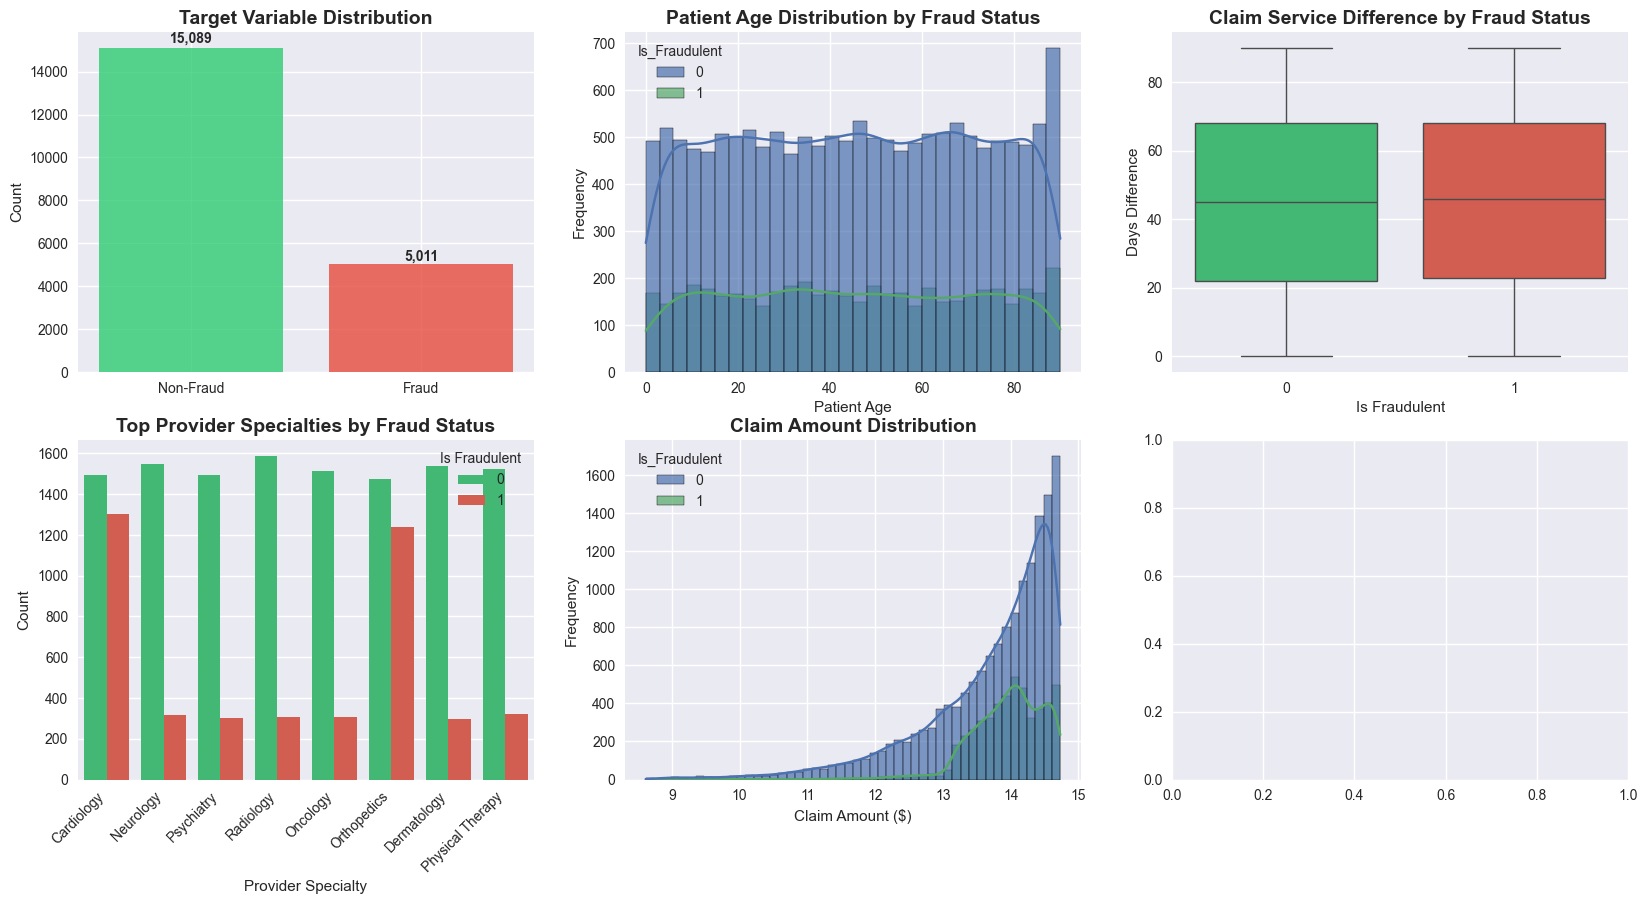

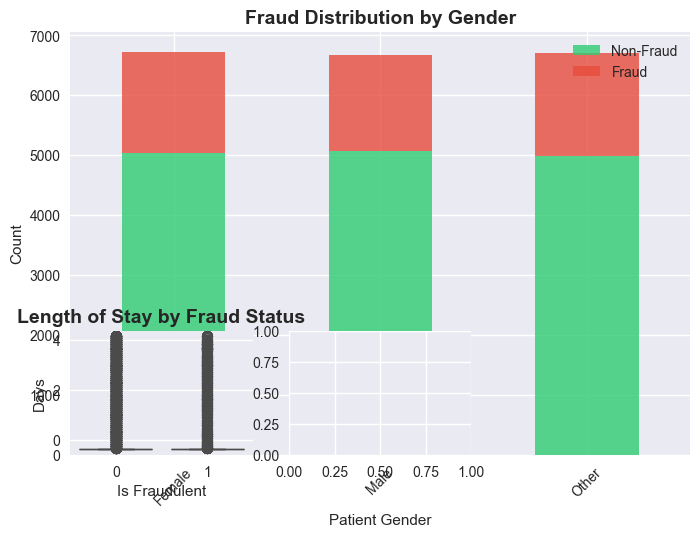

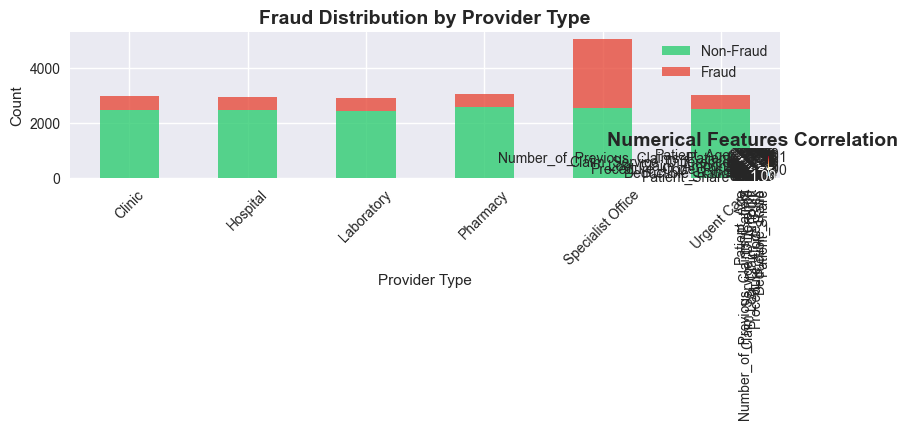

✅ Comprehensive visualizations created and saved to '../plots/feature_engineering_analysis.png'

🔍 Key Insights:
• Overall fraud rate: 24.9%
• Average patient age: 45.1 years
• Average claim amount: $13.76
• Most common provider specialty: Cardiology
• Average length of stay: -0.0 days


In [190]:
# 📊 Comprehensive Data Visualization Before Feature Engineering
print("🎨 Creating comprehensive visualizations...")

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 15))

# 1. Target Variable Distribution
plt.subplot(3, 3, 1)
fraud_counts = df_eda['Is_Fraudulent'].value_counts()
colors = ['#2ecc71', '#e74c3c']
bars = plt.bar(['Non-Fraud', 'Fraud'], fraud_counts.values, color=colors, alpha=0.8)
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count')
for bar, count in zip(bars, fraud_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + count*0.01,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# 2. Patient Age Distribution by Fraud Status
plt.subplot(3, 3, 2)
sns.histplot(data=df_eda, x='Patient_Age', hue='Is_Fraudulent', bins=30, alpha=0.7, kde=True)
plt.title('Patient Age Distribution by Fraud Status', fontsize=14, fontweight='bold')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')

# 3. Claim Service Difference Analysis
plt.subplot(3, 3, 3)
sns.boxplot(x='Is_Fraudulent', y='Claim_Service_Difference', data=df_eda, palette=colors)
plt.title('Claim Service Difference by Fraud Status', fontsize=14, fontweight='bold')
plt.xlabel('Is Fraudulent')
plt.ylabel('Days Difference')

# 4. Top Provider Specialties by Fraud Status
plt.subplot(3, 3, 4)
top_specialties = df_eda['Provider_Specialty'].value_counts().nlargest(8).index
specialty_data = df_eda[df_eda['Provider_Specialty'].isin(top_specialties)]
sns.countplot(data=specialty_data, x='Provider_Specialty', hue='Is_Fraudulent', palette=colors)
plt.title('Top Provider Specialties by Fraud Status', fontsize=14, fontweight='bold')
plt.xlabel('Provider Specialty')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Fraudulent')

# 5. Claim Amount Distribution
plt.subplot(3, 3, 5)
sns.histplot(data=df_eda, x='Log_Claim_Amount', hue='Is_Fraudulent', bins=50, alpha=0.7, kde=True)
plt.title('Claim Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Claim Amount ($)')
plt.ylabel('Frequency')

# 6. Patient Gender Analysis
plt.subplot(3, 3, 6)
gender_fraud = df_eda.groupby(['Patient_Gender', 'Is_Fraudulent']).size().unstack()
gender_fraud.plot(kind='bar', stacked=True, color=colors, alpha=0.8)
plt.title('Fraud Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Patient Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Fraud', 'Fraud'])

# 7. Length of Stay Analysis
plt.subplot(3, 3, 7)
sns.boxplot(x='Is_Fraudulent', y='Length_Of_Stay_Norm', data=df_eda, palette=colors)
plt.title('Length of Stay by Fraud Status', fontsize=14, fontweight='bold')
plt.xlabel('Is Fraudulent')
plt.ylabel('Days')

# 8. Provider Type Analysis
plt.subplot(3, 3, 8)
provider_fraud = df_eda.groupby(['Provider_Type', 'Is_Fraudulent']).size().unstack()
provider_fraud.plot(kind='bar', stacked=True, color=colors, alpha=0.8)
plt.title('Fraud Distribution by Provider Type', fontsize=14, fontweight='bold')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Fraud', 'Fraud'])

# 9. Numerical Features Correlation Heatmap
plt.subplot(3, 3, 9)
num_features = df_eda.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_eda[num_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0, 
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Numerical Features Correlation', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../plots/feature_engineering_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Comprehensive visualizations created and saved to '../plots/feature_engineering_analysis.png'")

# Print key insights
print(f"\n🔍 Key Insights:")
fraud_rate = df_eda['Is_Fraudulent'].mean() * 100
print(f"• Overall fraud rate: {fraud_rate:.1f}%")
print(f"• Average patient age: {df_eda['Patient_Age'].mean():.1f} years")
print(f"• Average claim amount: ${df_eda['Log_Claim_Amount'].mean():,.2f}")
print(f"• Most common provider specialty: {df_eda['Provider_Specialty'].mode()[0]}")
print(f"• Average length of stay: {df_eda['Length_Of_Stay_Norm'].mean():.1f} days")

## 🔧 Categorical Encoding Strategy

The choice of encoding technique depends on the cardinality and nature of each categorical variable:

### 📋 Encoding Strategy Table

| **Column**              | **Encoding Method**    | **Rationale**                                             |
|-------------------------|------------------------|-----------------------------------------------------------|
| `Patient_Gender`        | **One-Hot Encoding**   | Low cardinality (Male/Female/Other) - 3 categories       |
| `Patient_State`         | **Target Encoding**    | High cardinality (50+ states) - preserves fraud patterns |
| `Provider_Type`         | **One-Hot Encoding**   | Medium cardinality (Hospital/Clinic/Lab) - ~5 categories |
| `Provider_Specialty`    | **Target Encoding**    | High cardinality (100+ specialties) - captures fraud risk|
| `Diagnosis_Code`        | **Target Encoding**    | Very high cardinality (1000+ codes) - preserves signal  |
| `Admission_Type`        | **One-Hot Encoding**   | Low cardinality (Emergency/Elective/Urgent) - 4 categories|
| `Discharge_Type`        | **One-Hot Encoding**   | Low cardinality (Home/Transfer/AMA) - 6 categories       |
| `Service_Type`          | **One-Hot Encoding**   | Medium cardinality (Inpatient/Outpatient) - 3 categories |
| `Risk_Category`         | **One-Hot Encoding**   | Engineered feature (Low/High Risk) - 2 categories        |
| `Patient_Age_Group`     | **One-Hot Encoding**   | Engineered bins (Child/Adult/Senior) - 4 categories      |
| `Distance_Category`     | **One-Hot Encoding**   | Engineered bins (Low/Medium/High) - 3 categories         |

### 🎯 Encoding Principles
- **One-Hot Encoding**: For categorical variables with ≤10 unique values
- **Target Encoding**: For high-cardinality categorical variables (>10 unique values)
- **Smoothing**: Applied to target encoding to prevent overfitting (α=0.3)

In [191]:
df_eda.head()  # Display the first few rows of the DataFrame

,Patient_Age,Patient_Gender,Patient_State,Provider_Type,Provider_Specialty,Diagnosis_Code,Procedure_Code,Admission_Type,Discharge_Type,Service_Type,...,Patient_High_Claims,Cross_State,Provider_Patient_Distance_Category,Procedure_Code_Risk,Emergency_Flag,Is_Long_Stay,Length_Of_Stay_Norm,Deductible_Ratio,Copay_Ratio,Patient_Share
0,28.0,Female,WI,Laboratory,Cardiology,A09,93610,Elective,Rehab/Skilled Nursing,Inpatient,...,0,1,High,0.254511,0,1,3.174079,0.007441,0.001784,4264.65
1,40.0,Other,CO,Laboratory,Cardiology,J02.9,99203,Elective,Deceased,Outpatient,...,0,1,Low,0.406127,0,0,-0.375823,0.001921,0.000452,4469.83
2,90.0,Female,FL,Hospital,Neurology,I25.10,71045,Urgent,Deceased,Pharmacy,...,0,1,Medium,0.222552,0,0,-0.375823,0.001628,0.000411,3058.64
3,49.0,Other,MD,Specialist Office,Pediatrics,I10,93571,Trauma,Deceased,Pharmacy,...,0,1,Medium,0.229188,0,0,-0.375823,0.001027,0.000803,1047.11
4,24.0,Female,FL,Specialist Office,Pediatrics,H25.9,93571,Emergency,Deceased,Emergency Room,...,0,1,High,0.229188,1,0,-0.375823,0.001459,0.000406,3894.95


In [192]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns for One-Hot Encoding
categorical_cols = ['Patient_Gender', 'Provider_Type', 'Admission_Type', 'Discharge_Type', 'Service_Type', 'Risk_Category','Patient_Age','Provider_Patient_Distance_Category']

# Initialize OneHotEncoder with drop='first' to avoid multicollinearity and sparse=False for DataFrame compatibility
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_array = ohe.fit_transform(df_eda[categorical_cols])

# Retrieve the new encoded feature names
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Convert the encoded array to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df_eda.index)

# Drop original categorical columns and concatenate encoded columns
df_eda = df_eda.drop(columns=categorical_cols).join(encoded_df)

df_eda.drop(columns=['Age_Group', 'Patient_Age_Group'], inplace=True)

In [193]:
df_eda.head()  # Display the first few rows of the encoded DataFrame

,Patient_State,Provider_Specialty,Diagnosis_Code,Procedure_Code,Number_of_Previous_Claims_Patient,Number_of_Previous_Claims_Provider,Is_Fraudulent,Claim_Service_Difference,Cost_Per_Procedure,Log_Claim_Amount,...,Patient_Age_83.0,Patient_Age_84.0,Patient_Age_85.0,Patient_Age_86.0,Patient_Age_87.0,Patient_Age_88.0,Patient_Age_89.0,Patient_Age_90.0,Provider_Patient_Distance_Category_Low,Provider_Patient_Distance_Category_Medium
0,WI,Cardiology,A09,93610,0,16,0,46,154112.493333,13.044053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CO,Cardiology,J02.9,99203,0,6,1,2,627827.100000,14.448633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,FL,Neurology,I25.10,71045,0,2,0,42,750329.445000,14.221415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,MD,Pediatrics,I10,93571,0,2,1,5,114447.522000,13.257311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,FL,Pediatrics,H25.9,93571,0,15,0,36,348048.973333,14.551858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
import category_encoders as ce

# Define categorical columns for target encoding (usually high cardinality columns)
target_encode_cols = ['Patient_State', 'Provider_Specialty', 'Diagnosis_Code']

# Initialize TargetEncoder with smoothing to reduce overfitting
target_encoder = ce.TargetEncoder(cols=target_encode_cols, smoothing=0.3)

# Fit and transform the training data
df_eda[target_encode_cols] = target_encoder.fit_transform(df_eda[target_encode_cols], df_eda['Is_Fraudulent'])


In [195]:
df_eda.head()  # Display the first few rows of the DataFrame

,Patient_State,Provider_Specialty,Diagnosis_Code,Procedure_Code,Number_of_Previous_Claims_Patient,Number_of_Previous_Claims_Provider,Is_Fraudulent,Claim_Service_Difference,Cost_Per_Procedure,Log_Claim_Amount,...,Patient_Age_83.0,Patient_Age_84.0,Patient_Age_85.0,Patient_Age_86.0,Patient_Age_87.0,Patient_Age_88.0,Patient_Age_89.0,Patient_Age_90.0,Provider_Patient_Distance_Category_Low,Provider_Patient_Distance_Category_Medium
0,0.269080,0.465499,0.257231,93610,0,16,0,46,154112.493333,13.044053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.239351,0.465499,0.378588,99203,0,6,1,2,627827.100000,14.448633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.263473,0.169791,0.226950,71045,0,2,0,42,750329.445000,14.221415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.267198,0.175409,0.222555,93571,0,2,1,5,114447.522000,13.257311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.263473,0.175409,0.226006,93571,0,15,0,36,348048.973333,14.551858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
## Scale numerical features
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()
# Fit and transform the numerical columns
numerical_cols = df_eda.select_dtypes(include=['float64', 'int64']).columns
df_eda[numerical_cols] = scaler.fit_transform(df_eda[numerical_cols])

In [197]:
df_eda.head()  # Display the first few rows of the DataFrame

,Patient_State,Provider_Specialty,Diagnosis_Code,Procedure_Code,Number_of_Previous_Claims_Patient,Number_of_Previous_Claims_Provider,Is_Fraudulent,Claim_Service_Difference,Cost_Per_Procedure,Log_Claim_Amount,...,Patient_Age_83.0,Patient_Age_84.0,Patient_Age_85.0,Patient_Age_86.0,Patient_Age_87.0,Patient_Age_88.0,Patient_Age_89.0,Patient_Age_90.0,Provider_Patient_Distance_Category_Low,Provider_Patient_Distance_Category_Medium
0,1.261974,1.659610,0.151646,0.140610,-0.01728,0.901833,0,0.036400,-0.430402,-0.786060,...,-0.109465,-0.109232,-0.110393,-0.104226,-0.107825,-0.110853,-0.105679,-0.103737,-0.582942,-0.990887
1,-0.635083,1.659610,2.472967,0.826761,-0.01728,-0.608247,1,-1.635309,1.582017,0.748881,...,-0.109465,-0.109232,-0.110393,-0.104226,-0.107825,-0.110853,-0.105679,-0.103737,1.715437,-0.990887
2,0.904174,-0.610372,-0.427573,-2.627671,-0.01728,-1.212278,0,-0.115574,2.102428,0.500575,...,-0.109465,-0.109232,-0.110393,-0.104226,-0.107825,-0.110853,-0.105679,9.639774,-0.582942,1.009197
3,1.141892,-0.567247,-0.511650,0.135826,-0.01728,-1.212278,1,-1.521329,-0.598905,-0.553009,...,-0.109465,-0.109232,-0.110393,-0.104226,-0.107825,-0.110853,-0.105679,-0.103737,-0.582942,1.009197
4,0.904174,-0.567247,-0.445633,0.135826,-0.01728,0.750825,0,-0.343534,0.393473,0.861687,...,-0.109465,-0.109232,-0.110393,-0.104226,-0.107825,-0.110853,-0.105679,-0.103737,-0.582942,-0.990887


In [198]:
# 💾 Export Processed Data for Model Training
output_file = '../data/health_claims_cleaned.csv'

print("🚀 Exporting processed dataset for model training...")
print(f"📁 Output file: {output_file}")
print(f"📊 Final dataset shape: {df_eda.shape}")

# Validate final dataset
print(f"\n🔍 Final Data Validation:")
print(f"  • Total features: {df_eda.shape[1]}")
print(f"  • Total samples: {df_eda.shape[0]:,}")
print(f"  • Missing values: {df_eda.isnull().sum().sum()}")
print(f"  • Data types: {df_eda.dtypes.value_counts().to_dict()}")

# Feature breakdown
numerical_cols = df_eda.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_eda.select_dtypes(include=['object']).columns

print(f"\n📈 Feature Summary:")
print(f"  • Numerical features: {len(numerical_cols)}")
print(f"  • Categorical features: {len(categorical_cols)}")

# Target variable validation
target_dist = df_eda['Is_Fraudulent'].value_counts()
fraud_rate = df_eda['Is_Fraudulent'].mean() * 100
print(f"\n🎯 Target Variable (Is_Fraudulent):")
print(f"  • Fraud rate: {fraud_rate:.1f}%")
print(f"  • Distribution: {target_dist.to_dict()}")
print(f"  • Class balance ratio: {target_dist[0]/target_dist[1]:.1f}:1")

# Export the processed dataset
try:
    df_eda.to_csv(output_file, index=False)
    
    # Verify export
    import os
    if os.path.exists(output_file):
        file_size = os.path.getsize(output_file) / 1024**2  # Size in MB
        print(f"\n✅ Export successful!")
        print(f"  • File size: {file_size:.2f} MB")
        print(f"  • Ready for model training!")
        print(f"  • Next step: Open notebook 03_model_experiments.ipynb")
    else:
        print("❌ Export verification failed!")
        
except Exception as e:
    print(f"❌ Export failed: {e}")

print(f"\n🎊 Feature Engineering Complete!")
print("=" * 60)
print("📋 FEATURE ENGINEERING SUMMARY")
print("=" * 60)
print(f"✅ Date features engineered: Claim_Service_Difference")
print(f"✅ Financial features created: Cost_Per_Procedure, Log_Claim_Amount, High_Cost_Flag")
print(f"✅ Demographic features: Age_Group, State_Risk, Patient flags")
print(f"✅ Geographic features: Cross_State, Distance_Category")
print(f"✅ Medical features: Procedure_Code_Risk, Emergency_Flag, Long_Stay")
print(f"✅ Financial ratios: Deductible_Ratio, Copay_Ratio, Patient_Share")
print(f"✅ Categorical encoding: One-Hot + Target encoding applied")
print(f"✅ Numerical scaling: StandardScaler applied to all numerical features")
print("=" * 60)

🚀 Exporting processed dataset for model training...
📁 Output file: ../data/health_claims_cleaned.csv
📊 Final dataset shape: (20100, 136)

🔍 Final Data Validation:
  • Total features: 136
  • Total samples: 20,100
  • Missing values: 0
  • Data types: {dtype('float64'): 129, dtype('int32'): 7}

📈 Feature Summary:
  • Numerical features: 129
  • Categorical features: 0

🎯 Target Variable (Is_Fraudulent):
  • Fraud rate: 24.9%
  • Distribution: {0: 15089, 1: 5011}
  • Class balance ratio: 3.0:1

✅ Export successful!
  • File size: 51.02 MB
  • Ready for model training!
  • Next step: Open notebook 03_model_experiments.ipynb

🎊 Feature Engineering Complete!
📋 FEATURE ENGINEERING SUMMARY
✅ Date features engineered: Claim_Service_Difference
✅ Financial features created: Cost_Per_Procedure, Log_Claim_Amount, High_Cost_Flag
✅ Demographic features: Age_Group, State_Risk, Patient flags
✅ Geographic features: Cross_State, Distance_Category
✅ Medical features: Procedure_Code_Risk, Emergency_Flag, 